# 14주 이진 베이지안 모델
Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.

Sklearn으로 이진 베이지안 모델링을 해보자.



## (1) X, Y 데이터를 생성

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [6]:
print("X\n",X[:5])
print("Y\n",Y[:5])

X
 [[ 2.83601904 -3.23923394]
 [ 1.03265777  0.79823489]
 [ 1.36706395 -0.25719822]
 [ 1.61349461 -2.22612085]
 [-0.45838151  1.39904438]]
Y
 [0 1 1 0 1]


## (2) X의 평균과 표준편차 계산해서 출력

In [7]:
X.mean(), X.std()

(0.04440705675883171, 1.3514934261110274)

## (3) 그래프 작성

scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.


findfont: Font family ['NanumSquareRound'] not found. Falling back to DejaVu Sans.


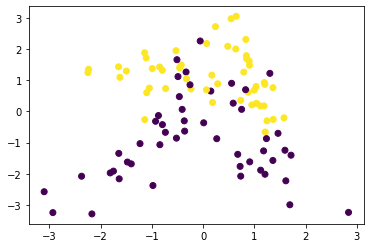

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)
plt.show()

## (4) 훈련데이터, 테스트데이터 3:1로 분리

train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

## (5) 훈련데이터에 대하여 BernoulliNB 모델링

X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.


In [10]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

## (6) 테스트데이터에 대하여 예측값을 출력

예측이 맞는지 실제값 Y와 비교해보자.


In [13]:
bnb.fit(X_train, Y_train)

BernoulliNB()

In [14]:
list(zip(bnb.predict(X_test),Y_test, X_test))

[(0, 0, array([ 1.20698109, -2.01570578])),
 (1, 1, array([-2.24602845,  1.24508379])),
 (0, 0, array([-3.09954992, -2.57636346])),
 (1, 0, array([1.30199898, 1.2199648 ])),
 (1, 0, array([-0.40838266,  0.06381237])),
 (0, 0, array([-1.74859765, -1.91581913])),
 (1, 0, array([0.82876625, 0.69554141])),
 (1, 1, array([-1.49620863,  1.2931898 ])),
 (1, 1, array([0.89823572, 1.6178847 ])),
 (0, 0, array([ 1.23528686, -0.87345693])),
 (0, 0, array([ 1.12250127, -1.88516203])),
 (0, 0, array([-1.47633735, -1.62391655])),
 (0, 0, array([-1.81118305, -1.97327316])),
 (0, 0, array([-1.40105846, -1.68313604])),
 (0, 1, array([ 1.57738314, -0.20666056])),
 (1, 1, array([1.03265777, 0.79823489])),
 (0, 0, array([ 0.01161345, -0.3665065 ])),
 (1, 1, array([0.28577386, 0.88440815])),
 (0, 0, array([-0.36711231, -0.3032018 ])),
 (0, 0, array([-1.63643549, -2.16306292])),
 (0, 0, array([-0.35988576, -0.63274267])),
 (0, 0, array([ 1.17953324, -1.2667779 ])),
 (1, 1, array([0.06992282, 2.17671893])),


## (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [15]:
bnb.score(X_test,Y_test)

0.84